# Training with Tensorflow Keras - CrackNet

In [26]:
%load_ext autoreload
%autoreload 2

import sys
WORKSPACE_BASE_PATH="/tf/notebooks/" # Parent directory containing src, checkpoints, models, etc.
CODE_BASE_PATH="/tf/notebooks/src/" # Path were components are stored.
DATA_BASE_PATH="/tf/notebooks/data/" # Directory with data in case it is not inside WORKSPACE BASE path.
sys.path.append(CODE_BASE_PATH)
from cnnmodels import cracknet

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Model definition

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1 (Conv2D)               (None, 110, 110, 32)      11648     
_________________________________________________________________
Conv1BN (BatchNormalization) (None, 110, 110, 32)      128       
_________________________________________________________________
Conv1Pool (MaxPooling2D)     (None, 52, 52, 32)        0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 42, 42, 48)        185904    
_________________________________________________________________
Conv2BN (BatchNormalization) (None, 42, 42, 48)        192       
_________________________________________________________________
Conv2Pool (MaxPooling2D)     (None, 19, 19, 48)        0         
_________________________________________________________________
Conv3 (Conv2D)               (None, 13, 13, 64)      

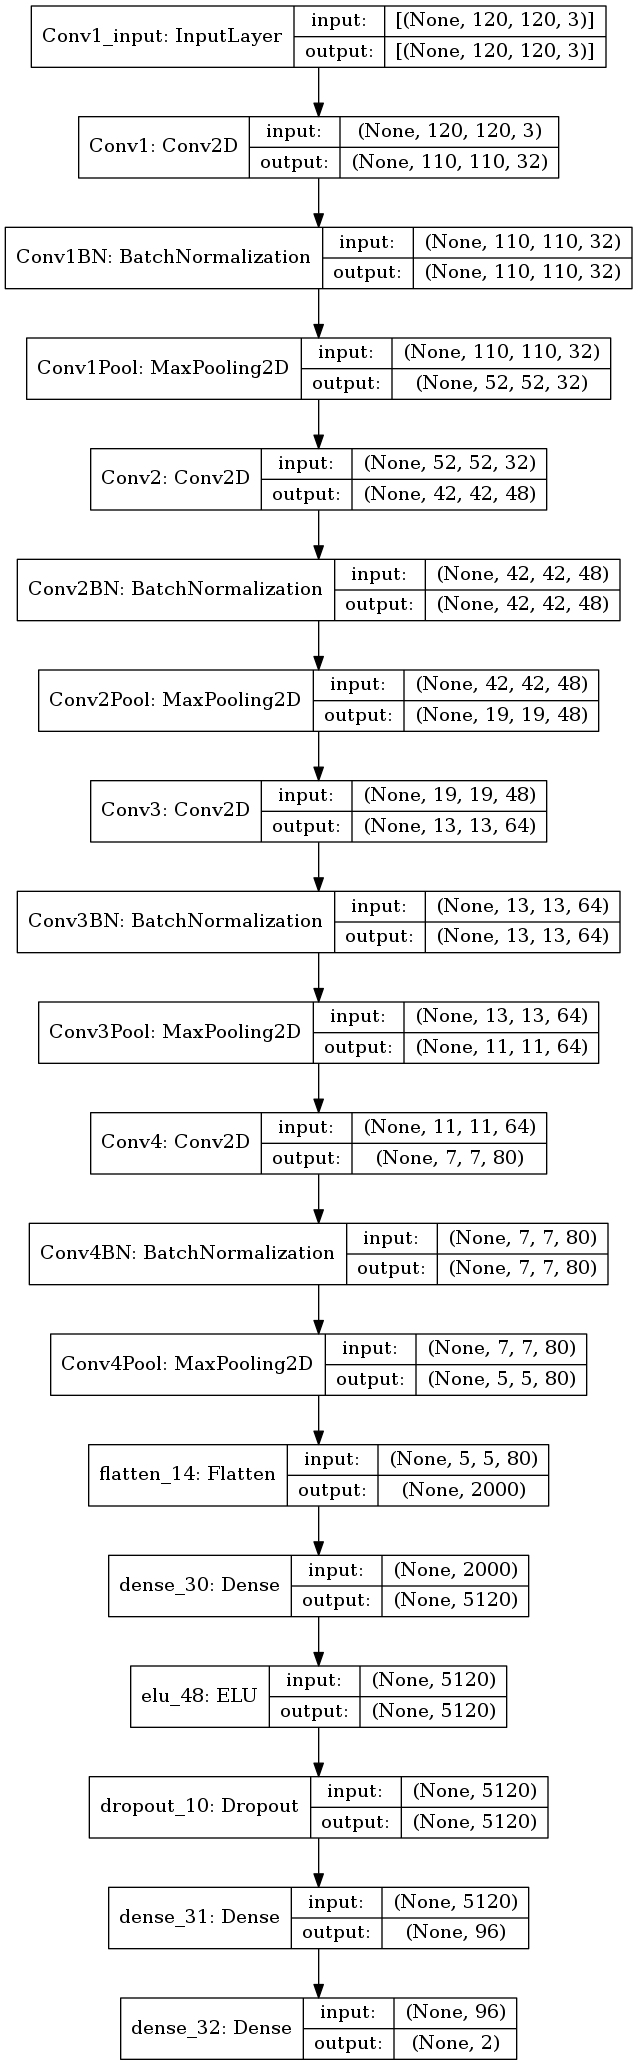

In [30]:
from tensorflow.keras.utils import plot_model

model = cracknet.build_cracknet()
model.summary()
plot_model(model, show_shapes=True)

## Training

In [5]:
MODEL_NAME="cracknet_cracks8020"

In [31]:
cracknet.train_cracknet(  model,
            target_size=(120,120),
            dataset_path=DATA_BASE_PATH+"/datasets/cracks_splitted8020/",
            training_path_prefix="train_set",
            test_path_prefix="test_set",
            history_file_path=WORKSPACE_BASE_PATH+"/training_logs/",
            history_filename=MODEL_NAME+".csv",
            checkpoint_path=WORKSPACE_BASE_PATH+"/model-checkpoints/",
            checkpoint_prefix=MODEL_NAME,
            number_of_epochs=30, # Original paper: 70 epochs / 32.535 seconds
            tensorboard_log_path=WORKSPACE_BASE_PATH+"/tensorboard_logs/",
)

Found 32000 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.
Epoch 1/30
1000/1000 [==============================] - 2062s 2s/step - loss: 2.0484 - acc: 0.7602 - val_loss: 5.3479 - val_acc: 0.5000
Epoch 2/30
1000/1000 [==============================] - 2238s 2s/step - loss: 9.5429 - acc: 0.5010 - val_loss: 15.3314 - val_acc: 0.5015
Epoch 3/30
   4/1000 [..............................] - ETA: 45:19 - loss: 13.9491 - acc: 0.5312

KeyboardInterrupt: 

## Training Report

In [ ]:
import matplotlib
from utils.plotutils import plot_learning_curves_from_history_file
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10, 6)
fig = plot_learning_curves_from_history_file(WORKSPACE_BASE_PATH+"/training_logs/"+MODEL_NAME+".csv")

## Export model to SavedModelFormat

In [ ]:
import glob
import os

list_of_files = glob.glob(WORKSPACE_BASE_PATH+'/model-checkpoints/*.hdf5') 
CHECKPOINT_FILE = max(list_of_files, key=os.path.getctime) # last checkpoint
VERSION=1
print(CHECKPOINT_FILE)

In [ ]:
from utils.export_tools import convert_from_keras_to_savedmodel

convert_from_keras_to_savedmodel(
    input_filename=CHECKPOINT_FILE,
    export_path=WORKSPACE_BASE_PATH+'/models/'+MODEL_NAME+"/"+str(VERSION)
)